In [31]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader,Dataset
from torchvision import datasets,transforms,utils
import matplotlib.pyplot as plt
import torch.nn.functional as F

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset=datasets.FashionMNIST('Fashion_MNIST/',transform=transform,download=True)
train_loader=DataLoader(trainset,batch_size=64,shuffle=True)



torch.Size([64, 1, 28, 28])
torch.Size([64])


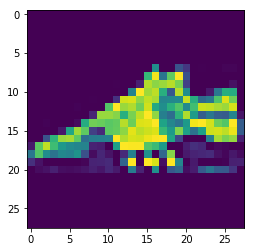

In [32]:
image,label=next(iter(train_loader))
print(image.size())
print(label.size())
plt.imshow(image[0][0,:])

In [33]:
label

tensor([ 7,  5,  4,  0,  0,  6,  6,  0,  6,  1,  4,  6,  3,  6,
         2,  9,  9,  8,  9,  1,  7,  4,  7,  3,  5,  9,  9,  7,
         7,  1,  5,  8,  4,  9,  0,  3,  9,  4,  8,  2,  5,  0,
         2,  4,  2,  1,  6,  1,  9,  6,  4,  9,  2,  6,  3,  8,
         5,  6,  1,  2,  5,  1,  0,  0])

In [34]:
class Network(torch.nn.Module):
    
    def __init__(self):
        super(Network,self).__init__()
        self.fc1=torch.nn.Linear(784,400)
#        self.dropout1=torch.nn.Dropout(p=0.2)
        self.fc2=torch.nn.Linear(400,200)
        self.dropout2=torch.nn.Dropout(p=0.2)
        self.fc3=torch.nn.Linear(200,100)
        self.fc4=torch.nn.Linear(100,100)
        self.fc5=torch.nn.Linear(100,10)
        #self.sigmoid=torch.nn.Sigmoid()
        
        
    def forward(self,x):
        
        out1=F.relu(self.fc1(x))
#        out1=self.dropout1(out1)
        out2=F.relu(self.fc2(out1))
        out2=self.dropout2(out2)
        out3=F.relu(self.fc3(out2))
        out4=F.relu(self.fc4(out3))
        out5=self.fc5(out4)   #sof max at end, or sigmoid all the way did not work out
        #y_pred=F.softmax(out4,dim=1)   #if don't need probability as out put not necessary output4 is batch_size*10
        y_pred=out5
        return y_pred

model=Network()    
    

In [35]:
epochs=10
criterion=torch.nn.CrossEntropyLoss()  #if increase the lr to 0.1, it kicks to local min and stays
optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)  #had to change from SGD to Adam but later noy much difference
lr_scheduler_=torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
#lr_scheduler_=torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=epochs)

In [36]:
#torch.set_printoptions(precision=2)

loss_running=0
count=0
count_batch=0
sum_acc=0

for epoch in range(epochs):

    for input,label in iter(train_loader):
        
        input.resize_(input.size()[0], 784)
        y_pred=model(input)   #this is 64 (bacth_size)*10

        if(count==0): print(y_pred.size(),label.size())
        loss=criterion(y_pred,label)    #criterion(y_pred,label), crossentropy criterion need long (output of forward) and normal tensor (target)
        loss_running=loss_running+loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count=count+1
        #y_pred_round=torch.round(y_pred)
        count_batch=count_batch+(label.size()[0])
        _,y_pred_=torch.max(y_pred,dim=1)    #argmax is the second value returned by torch.max()  ,this collapse dimension to batch size with argmax of probabililty/value (second) item, first one is the value itself 
          
        acc=(label==y_pred_).sum().item()    #/label.size()[0]
        sum_acc=sum_acc+acc
        if(count%200==0): print('epoch',epoch,'/',epochs,'running_loss:',(loss_running/count_batch),'Accuracy',(sum_acc*100/count_batch))
 
    check_loss=(loss_running/count_batch)
    lr_scheduler_.step(check_loss)
   
    

torch.Size([64, 10]) torch.Size([64])
epoch 0 / 10 running_loss: 0.025836774557828904 Accuracy 37.2890625
epoch 0 / 10 running_loss: 0.018354233403224497 Accuracy 55.47265625
epoch 0 / 10 running_loss: 0.015120960665711513 Accuracy 63.598958333333336
epoch 0 / 10 running_loss: 0.013374167630099692 Accuracy 67.916015625
epoch 1 / 10 running_loss: 0.012128383541557045 Accuracy 70.97142321160581
epoch 1 / 10 running_loss: 0.011249220418375375 Accuracy 73.10858691121301
epoch 1 / 10 running_loss: 0.01058931996055658 Accuracy 74.76219185423365
epoch 1 / 10 running_loss: 0.010094696289046587 Accuracy 75.97393716786496
epoch 1 / 10 running_loss: 0.009682048437948705 Accuracy 77.01531675465407
epoch 2 / 10 running_loss: 0.009330020049585028 Accuracy 77.89910580290145
epoch 2 / 10 running_loss: 0.009016118037885816 Accuracy 78.66786039108686
epoch 2 / 10 running_loss: 0.008743771497599265 Accuracy 79.31950812838683
epoch 2 / 10 running_loss: 0.008536947855685392 Accuracy 79.83238745671412
epoch

In [37]:
# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

torch.Size([64, 1, 28, 28])
torch.Size([64])


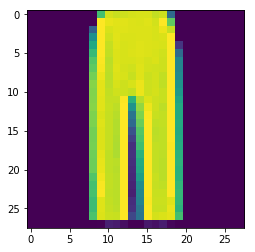

In [54]:
image,label=next(iter(test_loader))
print(image.size())
print(label.size())
plt.imshow(image[0][0,:])

In [55]:
labels_map = {0 : 'T-Shirt', 1 : 'Trouser', 2 : 'Pullover', 3 : 'Dress', 4 : 'Coat', 5 : 'Sandal', 6 : 'Shirt',
              7 : 'Sneaker', 8 : 'Bag', 9 : 'Ankle Boot'}

In [56]:
model.eval()
img=image[0]
img = img.resize_(img.size()[0], 784)
y_test=model.forward(img)

In [57]:
y_test

tensor([[  3.5379,  17.2386,  -1.4659,   3.3996,   0.1896,  -4.7693,
           1.2343,  -4.7561,  -2.6951, -10.3328]])

In [58]:
y_test_softmax=F.softmax(y_test,dim=1)
print(y_test_softmax)

tensor([[ 1.1216e-06,  1.0000e+00,  7.5293e-09,  9.7683e-07,  3.9420e-08,
          2.7676e-10,  1.1206e-07,  2.8044e-10,  2.2025e-09,  1.0615e-12]])


In [59]:
y_test_softmax.sum()

tensor(1.)

In [60]:
prob,index=torch.max(y_test_softmax,1) #dimension to get max (y axis C class)

In [61]:
print('prob,index',prob,index,labels_map[index.item()])

prob,index tensor([ 1.0000]) tensor([ 1]) Trouser
